In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

Добавляем датасет

In [2]:
ccg = pd.read_csv('CC_GENERAL.csv')
ccg.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Удаляем пустые значения

In [3]:
ccg.dropna(inplace=True)

In [4]:
ccg.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Проверяем данные, их тип

In [5]:
ccg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

Убираем колонку индексов

In [6]:
del ccg['CUST_ID']

PCA — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации
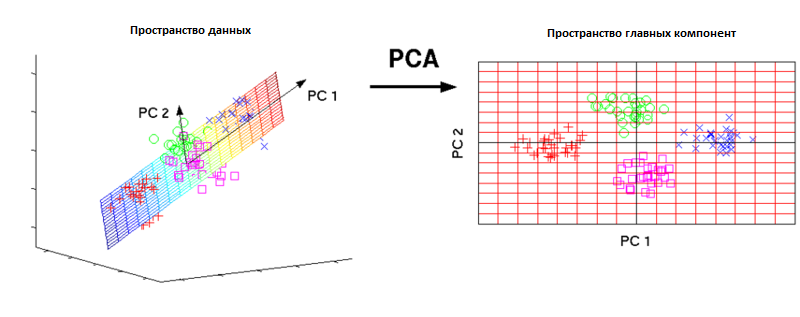

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(ccg)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(ccg), columns=PC_names)

**K-Means**

Диаграммы с разным количеством класетров

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


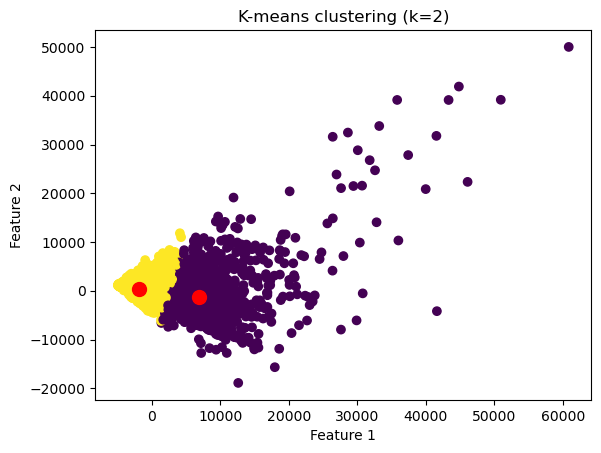

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


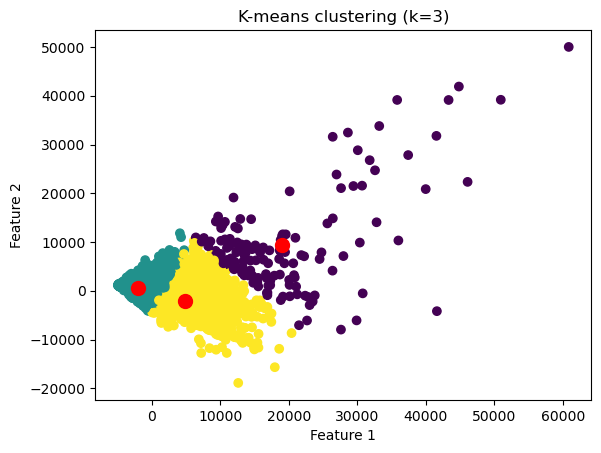

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


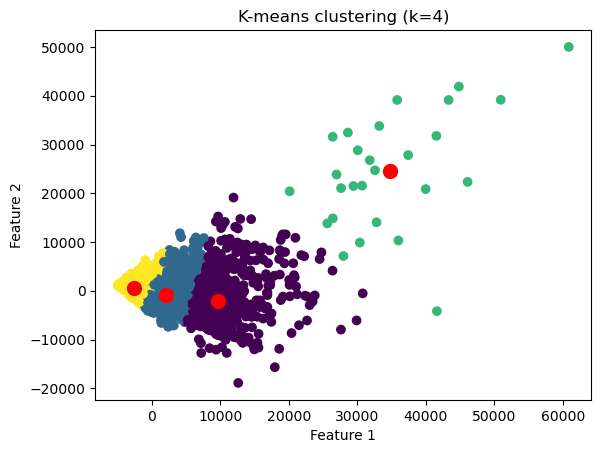

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


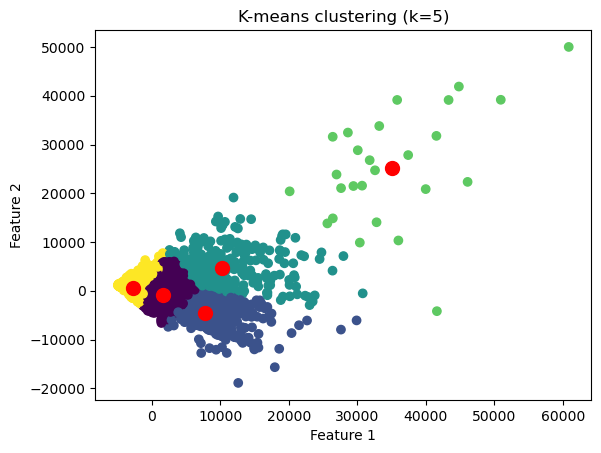

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


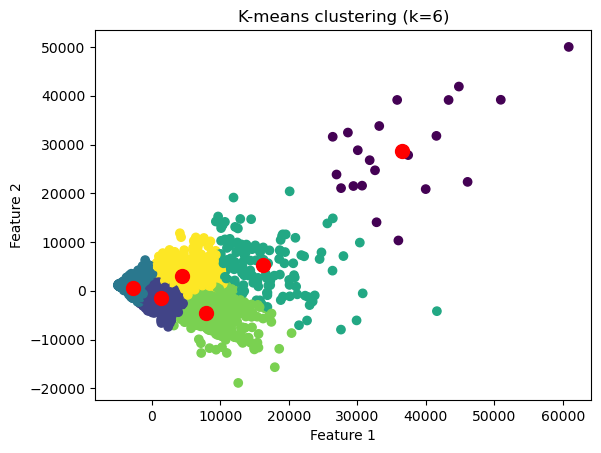

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


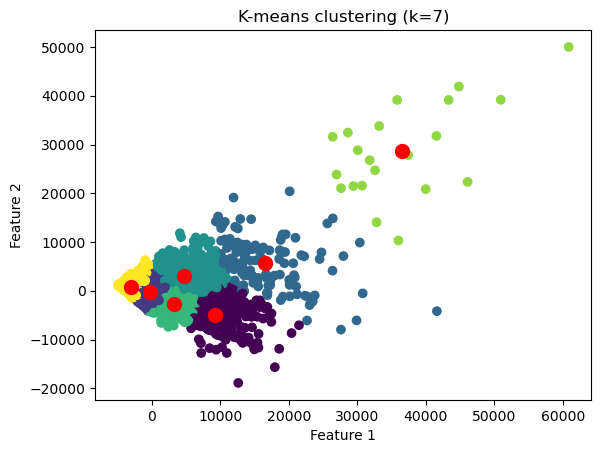

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


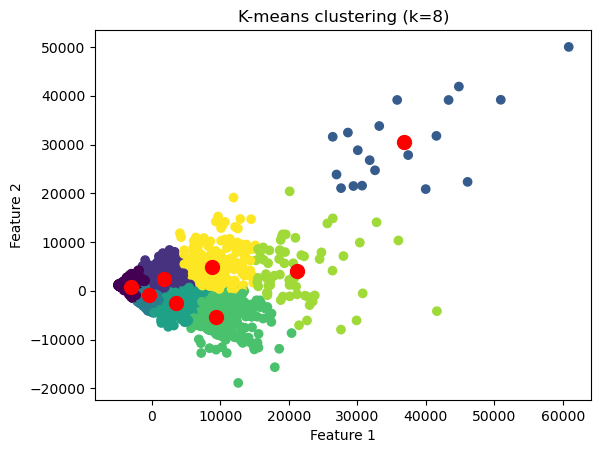

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


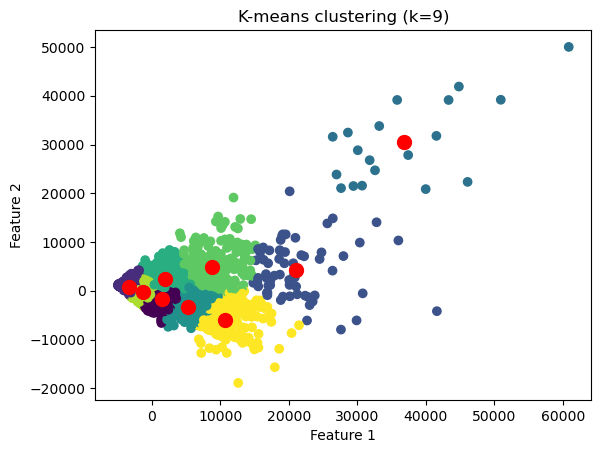

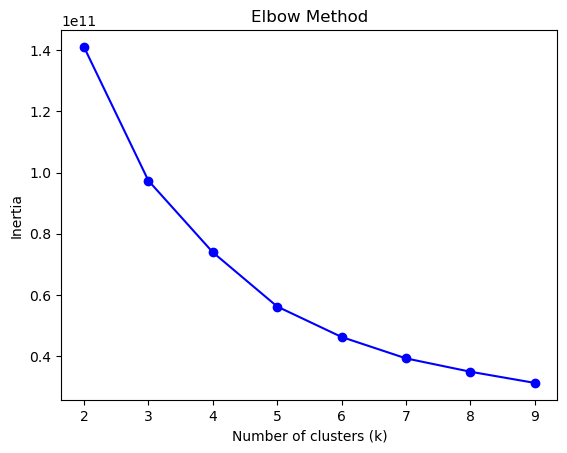

In [8]:
# Create a range of values for k
k_range = range(2, 10)
 
# Initialize an empty list to 
# store the inertia values for each k
inertia_values = []
 
# Fit and plot the data for each k value
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(pca_data)
    inertia_values.append(kmeans.inertia_)
    plt.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0],
                kmeans.cluster_centers_[:, 1],
                s=100, c='red')
    plt.title('K-means clustering (k={})'.format(k))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
 
# Plot the inertia values for each k
plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

Не считая редких случаев разброс данных не имеет четких границ

Фундаментальным шагом для любого неконтролируемого алгоритма является определение оптимального количества кластеров, в которые могут быть кластеризованы данные. Поскольку у нас нет какого-либо заранее определенного количества кластеров в обучении без учителя.

Elbow Method - это метод, который мы используем для определения количества центроидов (k). В этом методе для определения значения k мы непрерывно выполняем итерацию от k=1 до k=n. Для каждого значения k мы вычисляем значение суммы квадратов внутри кластера (WCSS).

WCSS — определяется как сумма квадратных расстояний между центроидами и каждой точкой.
Теперь, чтобы определить наилучшее количество кластеров (k), мы строим график зависимости k от их значения WCSS.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

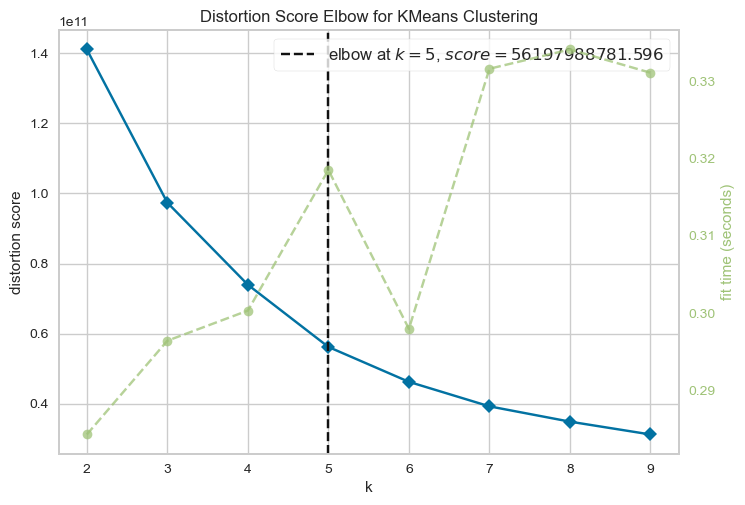

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(pca_data)       
distortion_visualizer.show()  

Судя по графику лучшим K оказалось значение 5

In [10]:
#n_clusters = 5
model = KMeans(distortion_visualizer.elbow_value_)
#model.fit(pca_data)
m=model.fit_predict(pca_data)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
pca_data['LABELS'] =  m

Коэффициент силуэта рассчитывается с использованием среднего расстояния внутри кластера ( a) и среднего расстояния до ближайшего кластера ( b) для каждого образца.

Лучшее значение — 1, худшее — -1. Значения около 0 указывают на перекрывающиеся кластеры. Отрицательные значения обычно указывают на то, что образец был отнесен к неправильному кластеру, поскольку другой кластер более похож.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [12]:
silhouette_sc = silhouette_score(pca_data, m)
print("Silhouette Score = ", silhouette_sc)

Silhouette Score =  0.5021490904567613


Оценка определяется как средняя мера сходства каждого кластера с его наиболее похожим кластером, где сходство — это отношение расстояний внутри кластера к расстояниям между кластерами. Таким образом, кластеры, расположенные дальше друг от друга и менее рассредоточенные, дадут лучший результат.

Минимальный балл равен нулю, а более низкие значения указывают на лучшую кластеризацию.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html

In [13]:
davies_bouldin_sc = davies_bouldin_score(pca_data, m)
print("davies_bouldin_score = ", davies_bouldin_sc)

davies_bouldin_score =  0.7859044721859282


Диаграмма распределения данных по кластерам

<Axes: ylabel='count'>

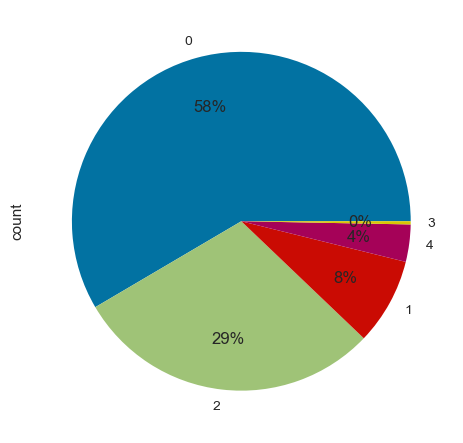

In [14]:
pca_data.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

**Пример с иерархической кластеризацией** (кластерограмма + k-means)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 29.617 seconds.
K=3 fitted in 31.506 seconds.
K=4 fitted in 33.381 seconds.
K=5 fitted in 36.655 seconds.
K=6 fitted in 40.268 seconds.
K=7 fitted in 41.827 seconds.
K=8 fitted in 42.265 seconds.
K=9 fitted in 44.556 seconds.


Text(0.5, 1.0, 'K-Means (scikit-learn)')

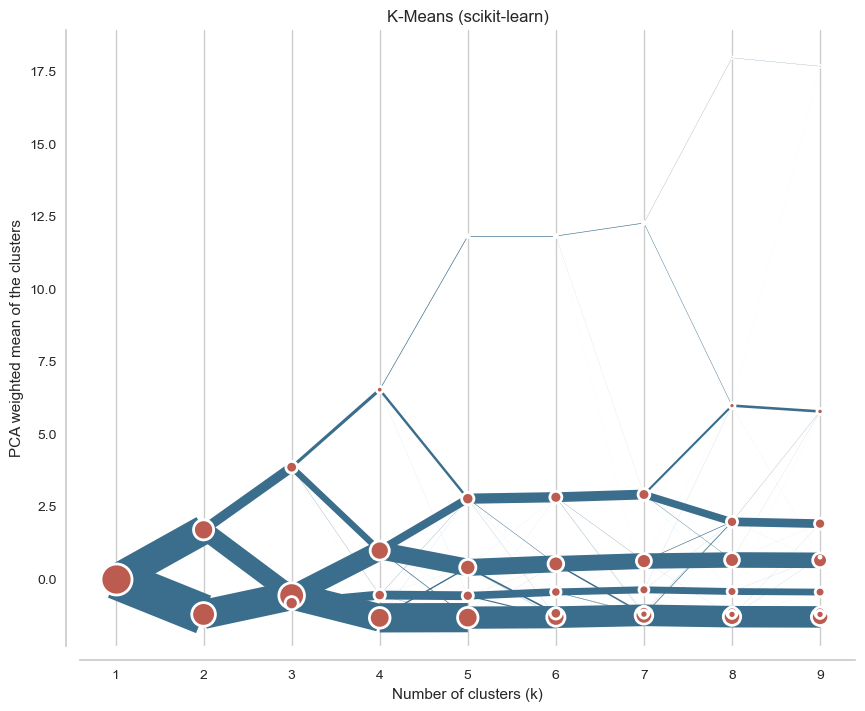

In [29]:
from clustergram import Clustergram
import urbangrammar_graphics as ugg

cgram = Clustergram(range(1, 10), n_init=1000)
cgram.fit(ccg_sc)

ax = cgram.plot(
    figsize=(10, 8),
    line_style=dict(color=ugg.COLORS[1]),
    cluster_style={"color": ugg.COLORS[2]},
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('K-Means (scikit-learn)')

**Метод кластеризации на основе плотности DBSCAN**

In [16]:
from sklearn.cluster import DBSCAN

In [17]:
dbscan = DBSCAN()

In [18]:
dbscan.fit(pca_data)

DBSCAN()

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ccg_sc = scaler.fit_transform(ccg)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(ccg_sc)

In [20]:
dbscan = DBSCAN(eps=2, min_samples=9)
db = dbscan.fit_predict(ccg_sc)

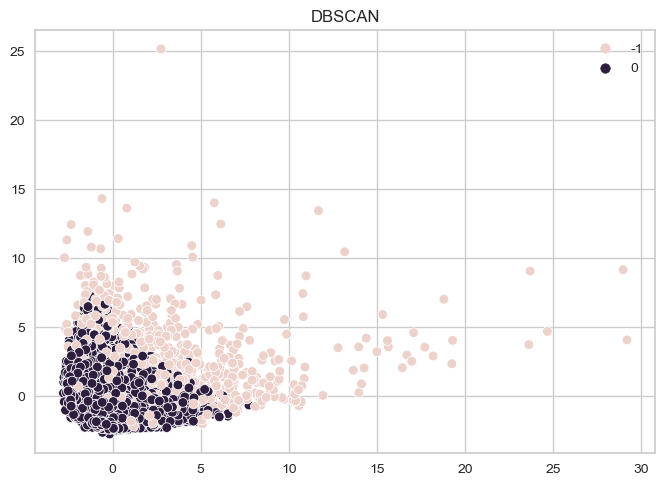

In [21]:
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=db)
plt.title("DBSCAN")
plt.show()

Коэффициент силуэта рассчитывается с использованием среднего расстояния внутри кластера ( a) и среднего расстояния до ближайшего кластера ( b) для каждого образца.

Лучшее значение — 1, худшее — -1. Значения около 0 указывают на перекрывающиеся кластеры. Отрицательные значения обычно указывают на то, что образец был отнесен к неправильному кластеру, поскольку другой кластер более похож.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [22]:
silhouette_sc = silhouette_score(pca_data, db)
print("Silhouette Score = ", silhouette_sc)

Silhouette Score =  0.5231910318227564


Оценка определяется как средняя мера сходства каждого кластера с его наиболее похожим кластером, где сходство — это отношение расстояний внутри кластера к расстояниям между кластерами. Таким образом, кластеры, расположенные дальше друг от друга и менее рассредоточенные, дадут лучший результат.

Минимальный балл равен нулю, а более низкие значения указывают на лучшую кластеризацию.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html

In [23]:
davies_bouldin_sc = davies_bouldin_score(pca_data, db)
print("davies_bouldin_score = ", davies_bouldin_sc)

davies_bouldin_score =  1.3358063709939785


**Метод кластеризации OPTIC**

In [24]:
from sklearn.cluster import OPTICS

clustering = OPTICS(min_samples=2)

In [25]:
op=clustering.fit_predict(ccg_sc)

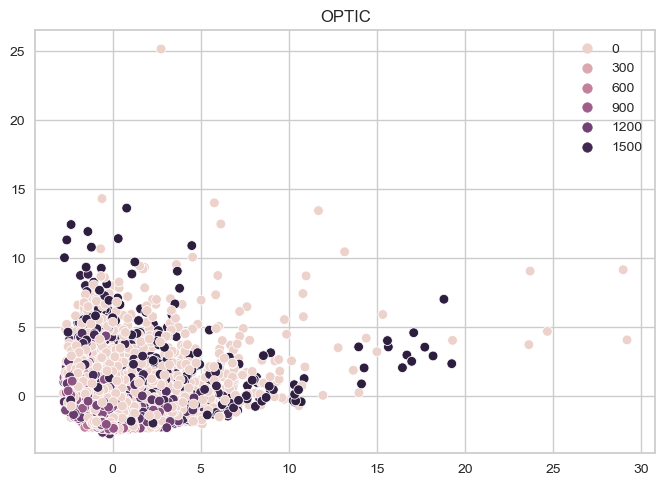

In [26]:
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=op)
plt.title("OPTIC")
plt.show()

Лучший результат достигается путем уменьшения min_samples, для min_samples число 2 является минимально допустимым значением

Коэффициент силуэта рассчитывается с использованием среднего расстояния внутри кластера ( a) и среднего расстояния до ближайшего кластера ( b) для каждого образца.

Лучшее значение — 1, худшее — -1. Значения около 0 указывают на перекрывающиеся кластеры. Отрицательные значения обычно указывают на то, что образец был отнесен к неправильному кластеру, поскольку другой кластер более похож.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [27]:
silhouette_sc = silhouette_score(pca_data, op)
print("Silhouette Score = ", silhouette_sc)

Silhouette Score =  -0.648871788773342


Оценка определяется как средняя мера сходства каждого кластера с его наиболее похожим кластером, где сходство — это отношение расстояний внутри кластера к расстояниям между кластерами. Таким образом, кластеры, расположенные дальше друг от друга и менее рассредоточенные, дадут лучший результат.

Минимальный балл равен нулю, а более низкие значения указывают на лучшую кластеризацию.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html

In [28]:
davies_bouldin_sc = davies_bouldin_score(pca_data, op)
print("davies_bouldin_score = ", davies_bouldin_sc)

davies_bouldin_score =  6.317774446440725


Судя по метрикам и диаграммам лучше всего разделили данные на класетры K-Means и DBSCAN со значениями silhouette_score 0.5 и 0.5 и davies_bouldin_score 0.7 и 1.3